# Lista 2

## Aluno: Lucas Lopes Amorim
## Resolva os seguintes problemas usando o computador.

### QUESTÃO 1
Uma empresa de transporte italiana deve transportar alguns contêineres vazios de suas 6 
lojas (em Verona, Perugia, Roma, Pescara, Taranto e Lamezia) para os principais portos 
nacionais (Gênova, Veneza, Ancona, Nápoles, Bari). Os estoques de contêineres nas lojas 
são os seguintes:

| | Contêineres vazios|
| -- | -- |
| Verona | 10 |
| Perugia | 12 |
| Roma | 20 |
| Pescara | 24 |
| Taranto | 18 |
| Lamezia | 40 |

As demandas nos portos são as seguintes:

| | Demanda de Contêineres |
| -- | -- |
| Gênova | 30 |
| Veneza | 15 |
| Ancona | 25 |
| Nápoles | 33 |
| Bari | 21 |

O transporte é realizado por uma frota de caminhões. O custo de transporte de cada contêiner 
é proporcional à distância percorrida pelo caminhão, e equivale a 30 € /km. As distâncias são 
as seguintes:

| | Gênova | Veneza | Ancona | Nápoles | Bari |
| -- | -- | -- | -- | -- | -- |
| **Verona** | 290 km | 115 km | 355 km | 715 km | 810 km |
| **Perugia** | 380 km | 340 km | 165 km | 380 km | 610 km |
| **Roma** | 505 km | 530 km | 285 km | 220 km | 450 km |
| **Pescara** | 655 km | 450 km | 155 km | 240 km | 315 km |
| **Taranto** | 1010 km | 840 km | 550 km | 305 km | 95 km |
| **Lamezia** | 1072 km | 1097 km | 747 km | 372 km | 333 km |

Formule o problema e encontre o menor custo total do transporte e a distribuição de 
contêineres de cada loja para cada porto.

**Resposta:**

*Essa questão foi resolvida tanto no Python quanto no Excel*

$C_{\,i \,\times\, j}$ = custo de transporte por contêiner da cidade $i$ para a cidade $j$

$C_T$ = custo total de transporte

$X_{\,i \,\times\, j}$ = quantidade de contêineres que vai da cidade $i$ para a cidade $j$

$$\large
C_{6\times5} = \begin{bmatrix}
    8700 &  3450 & 10650 & 21450 & 24300\\
    11400 & 10200 &  4950 & 11400 & 18300\\
    15150 & 15900 &  8550 &  6600 & 13500\\
    19650 & 13500 &  4650 &  7200 &  9450\\
    30300 & 25200 & 16500 &  9150 &  2850\\
    32160 & 32910 & 22410 & 11160 &  9990
\end{bmatrix}
$$


$$\large
X_{6\times5} = \begin{bmatrix}
    x_{1 \times 1} & x_{1 \times 2} & x_{1 \times 3} & x_{1 \times 4} & x_{1 \times 5}\\
    x_{2 \times 1} & x_{2 \times 2} & x_{2 \times 3} & x_{2 \times 4} & x_{2 \times 5}\\
    x_{3 \times 1} & x_{3 \times 2} & x_{3 \times 3} & x_{3 \times 4} & x_{3 \times 5}\\
    x_{4 \times 1} & x_{4 \times 2} & x_{4 \times 3} & x_{4 \times 4} & x_{4 \times 5}\\
    x_{5 \times 1} & x_{5 \times 2} & x_{5 \times 3} & x_{5 \times 4} & x_{5 \times 5}\\
    x_{6 \times 1} & x_{6 \times 2} & x_{6 \times 3} & x_{6 \times 4} & x_{6 \times 5}
\end{bmatrix}
$$

**Função Objetivo:**

$\Large \min C_T = \sum C_{6\times5} \times X_{6\times5}
$

**Restrições:**

Não podem sair mais contêineres que disponíveis:

*(cada elemento é uma restrição)*
$$\large
I_{6\times1} = \begin{bmatrix}
    \displaystyle\sum_{j=1}^j x_{1 \times j}\\
    \displaystyle\sum_{j=1}^j x_{2 \times j}\\
    \displaystyle\sum_{j=1}^j x_{3 \times j}\\
    \displaystyle\sum_{j=1}^j x_{4 \times j}\\
    \displaystyle\sum_{j=1}^j x_{5 \times j}\\
    \displaystyle\sum_{j=1}^j x_{6 \times j} 
\end{bmatrix}
$$

É preciso atender a demanda:

*(cada elemento é uma restrição)*
$$\large
D_{6\times1} = \begin{bmatrix}
    \displaystyle\sum_{i=1}^i x_{i \times 1}\\
    \displaystyle\sum_{i=1}^i x_{i \times 2}\\
    \displaystyle\sum_{i=1}^i x_{i \times 3}\\
    \displaystyle\sum_{i=1}^i x_{i \times 4}\\
    \displaystyle\sum_{i=1}^i x_{i \times 5}\\
    \displaystyle\sum_{i=1}^i x_{i \times 6}
\end{bmatrix}
$$

Não é possível fracionar contêineres:

$$
\Large x_{i\times j} \in \mathbb{Z}_+
$$

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ortools.sat.python import cp_model

In [111]:
distances = [
    [290, 115, 355, 715, 810],
    [380, 340, 165, 380, 610],
    [505, 530, 285, 220, 450],
    [655, 450, 155, 240, 315],
    [1010, 840, 550, 305, 95],
    [1072, 1097, 747, 372, 333]
]

transport_cost = np.array(distances)*30


In [112]:
transport_cost

array([[ 8700,  3450, 10650, 21450, 24300],
       [11400, 10200,  4950, 11400, 18300],
       [15150, 15900,  8550,  6600, 13500],
       [19650, 13500,  4650,  7200,  9450],
       [30300, 25200, 16500,  9150,  2850],
       [32160, 32910, 22410, 11160,  9990]])

In [125]:
# Definindo modelo
model = cp_model.CpModel()

In [126]:
# Número de contêineirs armazenados em cada uma das 6 cidades
# As cidades que armazenam os contêineres são representadas
# pelas linhas
inventory = {
    1: 10,
    2: 12,
    3: 20,
    4: 24,
    5: 18,
    6: 40
}

In [127]:
# Número de contêineirs demandados em cada uma das 6 cidades
# As cidades que demandam os contêineres são representadas
# pelas colunas
demand = {
    1: 30,
    2: 15,
    3: 25,
    4: 33,
    5: 21
}

In [128]:
# Criando variáveis
variables = np.array([[model.NewIntVar(0, inventory[i], f'x{i}{j}') for j in range(1, 6)] for i in range(1, 7)])
variables

array([[x11(0..10), x12(0..10), x13(0..10), x14(0..10), x15(0..10)],
       [x21(0..12), x22(0..12), x23(0..12), x24(0..12), x25(0..12)],
       [x31(0..20), x32(0..20), x33(0..20), x34(0..20), x35(0..20)],
       [x41(0..24), x42(0..24), x43(0..24), x44(0..24), x45(0..24)],
       [x51(0..18), x52(0..18), x53(0..18), x54(0..18), x55(0..18)],
       [x61(0..40), x62(0..40), x63(0..40), x64(0..40), x65(0..40)]],
      dtype=object)

In [129]:
# Adicionando restrições
# Todos os contêineres das cidades precisam ser deslocados
for i in range(6):
    model.Add(sum(variables[i]) == inventory[i+1])

In [130]:
# Adicionando restrições
# É preciso atender a demanda
for j in range(5):
    model.Add(sum([variables[i][j] for i in range(6)]) <= demand[j+1])

In [131]:
# Adicionando função objetivo
model.Minimize((transport_cost * variables).sum())

In [132]:
# Buscando solução
solver = cp_model.CpSolver()
status = solver.Solve(model)
status

4

In [133]:
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
    print(f'Custo mínimo = $ {solver.ObjectiveValue():,.2f}')
    print()
    print('Quantidade de contêineres que vai da cidade j para a cidade j:')
    print(np.array([list(map(lambda x: solver.Value(x), sublist)) for sublist in variables]))
else:
    print('Nenhuma solução encontrada.')

Custo mínimo = $ 1,148,340.00

Quantidade de contêineres que vai da cidade j para a cidade j:
[[ 0 10  0  0  0]
 [ 7  5  0  0  0]
 [20  0  0  0  0]
 [ 0  0 24  0  0]
 [ 0  0  0  0 18]
 [ 3  0  1 33  3]]


### QUESTÃO 2
Desenvolva um programa de computador para aplicar o algoritmo de Dijkistra para 
encontrar a menor distância entre os nós 1 e 3 no grafo abaixo.

![Grafo Questão 2](https://i.imgur.com/R6u0e37.png)

**Resposta:**

In [3]:
import networkx as nx

In [4]:
nodes_pos = {
    2: (0, 2),
    0: (1, 2),
    1: (2, 2),
    5: (0, 1),
    6: (1, 1),
    7: (2, 1),
    3: (0, 0),
    4: (1, 0)
}
edges_weights = {
     (0, 2): 29,
     (0, 5): 60,
     (0, 6): 51,
     (1, 0): 32,
     (1, 7): 21,
     (5, 3): 18,
     (6, 4): 51,
     (7, 0): 31,
     (7, 6): 25,
     (7, 4): 46,
     (4, 3): 34,
     (4, 5): 40
}

In [5]:
G = nx.DiGraph()

for node, pos in nodes_pos.items():
    G.add_node(node, pos=pos)

for nodes, weight in edges_weights.items():
    G.add_edge(nodes[0], nodes[1], weight=weight)

In [6]:
dij_dist = nx.dijkstra_path_length(G, source=1, target=3)
print(f'A menor distância entre os nós um e três é: {dij_dist}')

A menor distância entre os nós um e três é: 101


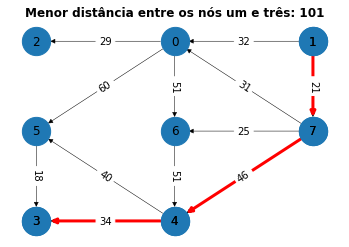

In [7]:
plt.figure()
plt.title(f"Menor distância entre os nós um e três: {dij_dist}", weight='bold')
# Encontra os nós do melhor caminho
dij = nx.dijkstra_path(G,source=1,target=3)

dijkstra = G.subgraph(dij)  # Obtém o subgrafo dos nós
pos_ = nx.get_node_attributes(G,'pos')  # Obtém as posições de todos os nós
labels = nx.get_edge_attributes(G,'weight') # Obtém os pesos dos vértices

# Constrói um grafo com todos os nós
nx.draw(G,pos_,with_labels=True, node_size=800, width=0.5)
# Colore os nós do caminho de vermelho
nx.draw(dijkstra,pos_,with_labels=True, edge_color="red", width=3, node_size=800)
# Adiciona rótulos aos vértices
nx.draw_networkx_edge_labels(G,pos_,edge_labels=labels)
plt.show()

### QUESTÃO 3

Resolva o seguinte problema de programação linear inteira:

$$\Large\max 2x_1 + 3x_2 \\ \Large x_1 + 2x_2 \leq 3 \\\Large 6x_1 + 8x_2 \leq 15 \\\Large x_1,x_2 \in \mathbb{Z}_+$$

**Resposta:**

*Essa questão foi resolvida tanto no Python quanto no Excel*

In [135]:
from ortools.linear_solver import pywraplp

In [9]:
# Cria um solver usando o SCIP
solver = pywraplp.Solver.CreateSolver('SCIP')

In [10]:
infinity = solver.infinity()
# cria as variáveis INTEIRAS x e y como não-negativas
x1 = solver.IntVar(0.0, infinity, 'x1')
x2 = solver.IntVar(0.0, infinity, 'x2')

In [11]:
# Adicionando restrições
solver.Add(x1 + 2*x2 <= 3)
solver.Add(6*x1 + 8*x2 <= 15);

In [12]:
# Definindo função objetivo
solver.Maximize(2*x1 + 3*x2)

In [15]:
# Executando o solver
status = solver.Solve()
status

0

In [16]:
if status == pywraplp.Solver.OPTIMAL:
    print('Solução:')
    print('Valor da função objetivo =', solver.Objective().Value())
    print('x1 =', x1.solution_value())
    print('x2 =', x2.solution_value())
else:
    print('O problema não tem uma solução ótima.')

Solução:
Valor da função objetivo = 5.0
x1 = 1.0
x2 = 1.0


### QUESTÃO 4
Um banco de investimento tem um orçamento total de 14 milhões de euros, podendo fazer 
4 tipos de investimentos (numerados 1,2,3,4). As tabelas a seguir especificam o valor a ser 
investido e a receita líquida de cada investimento. Cada investimento, se feito, deve ser 
feito integralmente

| Investimento | 1 | 2 | 3 | 4 |
| -- | -- | -- | -- | -- |
| Valor investido | 5 | 7 | 4 | 3 |
| Receita líquida | 16 | 22 | 12 | 8 |

Formule e resolva um programa para maximizar a receita líquida total, respeitando a 
restrição de orçamento.


**Resposta:**

```weights```: Vetor contendo o valor a ser investido em nada investimento

```values```: Vetor contendo a receita líquida de cada investimento

```capacities```: Vetor contendo o orçamento total do banco para investimento.

In [20]:
from ortools.algorithms import pywrapknapsack_solver

In [19]:
values = [16, 22, 12, 8]

weights = [[5, 7, 4, 3]]

capacities = [14]

In [21]:
# Declarando o Solver
solver = pywrapknapsack_solver.KnapsackSolver(
    pywrapknapsack_solver.KnapsackSolver.
    KNAPSACK_MULTIDIMENSION_BRANCH_AND_BOUND_SOLVER, 'Investimento')

In [31]:
solver.Init(values, weights, capacities)
computed_value = solver.Solve()
packed_items = []
packed_weights = []
total_weight = 0
print('Receita líquida total =', computed_value, 'milhões de euros')
for i in range(len(values)):
    if solver.BestSolutionContains(i):
        packed_items.append(i)
        packed_weights.append(weights[0][i])
        total_weight += weights[0][i]
print('Valor investido total =', total_weight, 'milhões de euros')
print('Investimentos realizados:', list(np.array(packed_items)+1))
print('Valor dos investimentos realizados:', packed_weights)

Receita líquida total = 42 milhões de euros
Valor investido total = 14 milhões de euros
Investimentos realizados: [2, 3, 4]
Valor dos investimentos realizados: [7, 4, 3]
